In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Load dataset

In [2]:
df = pd.read_csv("datasets/boston-marathon/dataset-2019.csv")

## Exploration data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank_Tot      26651 non-null  int64 
 1   Age           26651 non-null  int64 
 2   Gender        26651 non-null  object
 3   Country       26651 non-null  object
 4   Result_hr     26651 non-null  object
 5   Result_sec    26651 non-null  int64 
 6   Rank_Gender   26651 non-null  int64 
 7   Country_code  26651 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.6+ MB


In [4]:
df.describe()

,Rank_Tot,Age,Result_sec,Rank_Gender
count,26651.000000,26651.000000,26651.000000,26651.000000
mean,13326.800946,42.799895,13980.057184,6731.454242
std,7693.901503,11.537523,2697.850346,3962.252174
min,1.000000,18.000000,7677.000000,1.000000
25%,6664.500000,34.000000,12025.500000,3332.000000
50%,13327.000000,43.000000,13534.000000,6664.000000
75%,19989.500000,51.000000,15538.500000,9995.000000
max,26652.000000,83.000000,25197.000000,14671.000000


In [5]:
# there are a lot of countries in this dataset (109 - 92) which will cause a significant impact to the dataset
# country_code and country have different unique values
df.describe(include="O")

,Gender,Country,Result_hr,Country_code
count,26651,26651,26651,26651
unique,2,109,9558,92
top,M,United States,3:49:19,USA
freq,14670,18902,13,19843


In [12]:
countries = df["Country"].unique()
countries.sort()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Barbados', 'Belarus', 'Belgium', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Guatemala', 'Guyana', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Korea, Republic of', 'Kuwait', 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Malta', 'Mexico',
       'Moldova', 'Monaco', 'Morocco', 'Namibia', 'Nepal', 'Netherlands',
       'New Zealand', 'Nicaragua

In [14]:
countries_code = df["Country_code"].unique()
countries_code.sort()
countries_code

array(['ALG', 'AND', 'ARG', 'ARM', 'ARU', 'AUS', 'AUT', 'BAR', 'BEL',
       'BER', 'BIZ', 'BLR', 'BOL', 'BRA', 'CAN', 'CAY', 'CHI', 'CHN',
       'COL', 'CRC', 'CRO', 'CYP', 'CZE', 'DEN', 'DOM', 'ECU', 'ESA',
       'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'FRO', 'GBR', 'GER', 'GRE',
       'GUA', 'HKG', 'HON', 'HUN', 'INA', 'IND', 'IRL', 'ISL', 'ISR',
       'ITA', 'JPN', 'KEN', 'KOR', 'KSA', 'KUW', 'LAT', 'LTU', 'LUX',
       'MAC', 'MAR', 'MAS', 'MDA', 'MEX', 'MLT', 'MON', 'MTQ', 'NED',
       'NEP', 'NOR', 'NZL', 'PAN', 'PER', 'PHI', 'PLE', 'POL', 'POR',
       'PRI', 'ROU', 'RSA', 'RUS', 'SIN', 'SLO', 'SRB', 'SUI', 'SVK',
       'SWE', 'THA', 'TRI', 'TUR', 'TWN', 'UAE', 'UKR', 'URU', 'USA',
       'VEN', 'VIE'], dtype=object)

In [15]:
df[df["Country"] == "Afghanistan"]["Country_code"]

11280    USA
Name: Country_code, dtype: object

I guess all countries code of the missing countries are wrong. This feature is also like country so we drop this feature.

In [16]:
df = df.drop("Country_code", axis=1)

### Check null

In [18]:
# the dataset doesn't miss any information
df.isnull().sum()

Rank_Tot       0
Age            0
Gender         0
Country        0
Result_hr      0
Result_sec     0
Rank_Gender    0
dtype: int64

### Univariate analysis

Univariate involves the analysis of a single variable.

#### Country

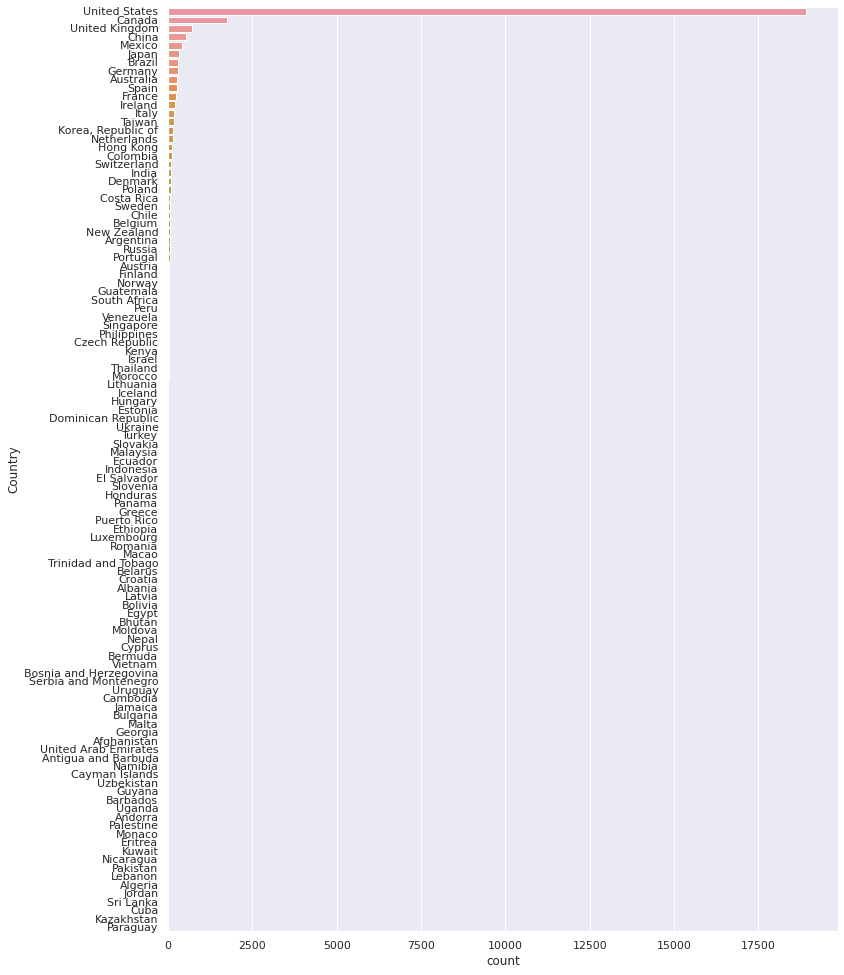

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 17))
sns.countplot(y="Country",
              data=df,
              ax=ax,
              order=df["Country"].value_counts().index);

Because the marathon was organized in Boston - America, so it is easy to understand that America has the highest participants. But other participants are from other places like Asia, Eroupe, Africa

#### Gender

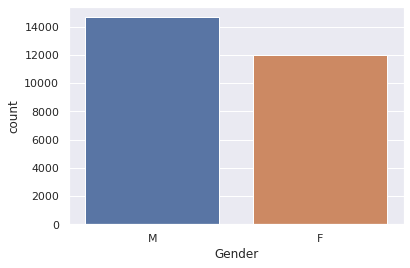

In [37]:
sns.countplot(x="Gender",
              data=df,
              order=df["Gender"].value_counts().index);

In [53]:
print("Percentage of the Male in dataset: %0.2f%%" % (df["Gender"].value_counts()["M"] / len(df) * 100))

Percentage of the Male in dataset: 55.04%


The different percentage between two categories is not really high

#### Age

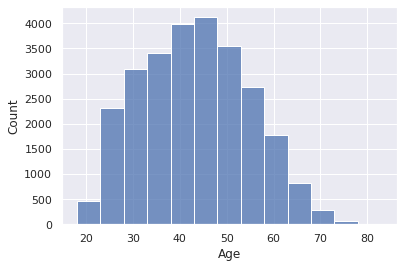

In [62]:
sns.histplot(data=df, x="Age", binwidth=5);

Most of the participants have age ranging from 23 - 62. This feature data seems to have the bell shape.

#### Result second

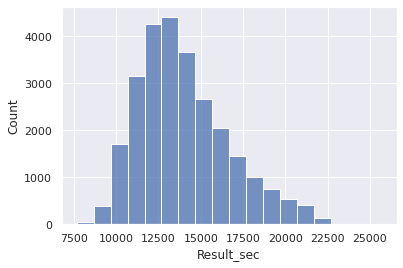

In [64]:
sns.histplot(data=df, x="Result_sec", binwidth=1000);

The participants' finish time are ranging from ... - .... This feature data doesn't seem to have the bell shape.

#### Rank Gender

In [68]:
min_female_rank = df.groupby(["Gender"])["Rank_Gender"].min()["F"]
max_female_rank = df.groupby(["Gender"])["Rank_Gender"].max()["F"]

min_male_rank = df.groupby(["Gender"])["Rank_Gender"].min()["M"]
max_male_rank = df.groupby(["Gender"])["Rank_Gender"].max()["M"]

print(f"Rank of female is from {min_female_rank} to {max_female_rank}")
print(f"Rank of male is from {min_male_rank} to {max_male_rank}")

Rank of female is from 1 to 11981
Rank of male is from 1 to 14671


#### Rank Total

In [70]:
min_female_rank = df.groupby(["Gender"])["Rank_Tot"].min()["F"]
max_female_rank = df.groupby(["Gender"])["Rank_Tot"].max()["F"]

min_male_rank = df.groupby(["Gender"])["Rank_Tot"].min()["M"]
max_male_rank = df.groupby(["Gender"])["Rank_Tot"].max()["M"]

print(f"Rank of female is from {min_female_rank} to {max_female_rank}")
print(f"Rank of male is from {min_male_rank} to {max_male_rank}")

Rank of female is from 36 to 26652
Rank of male is from 1 to 26651


From the dataset, I checked and saw it has many missing positions, unlike a correct leaderboard

### Multivariate analysis

### Notes:
- Group people by continent